# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification



In [48]:
data = pd.read_csv("synthetic_data.csv")
X = data[['x', 'y']].values
y = data['class'].values

X_synthetic, y_synthetic = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                                               n_clusters_per_class=1, class_sep=2, random_state=42)
y_synthetic = np.where(y_synthetic == 0, 2, y_synthetic) 

X_full = np.vstack((X, X_synthetic))
y_full = np.hstack((y, y_synthetic))



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)




KNeighborsClassifier()

In [51]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

metrics = {'Model': ['Logistic Regression', 'SVM', 'KNN'],
           'Accuracy': [accuracy_score(y_test, y_pred_log_reg), 
                        accuracy_score(y_test, y_pred_svm), 
                        accuracy_score(y_test, y_pred_knn)],
           'Precision': [precision_score(y_test, y_pred_log_reg, average='macro'),
                         precision_score(y_test, y_pred_svm, average='macro'),
                         precision_score(y_test, y_pred_knn, average='macro')],
           'Recall': [recall_score(y_test, y_pred_log_reg, average='macro'),
                      recall_score(y_test, y_pred_svm, average='macro'),
                      recall_score(y_test, y_pred_knn, average='macro')]}
metrics_df = pd.DataFrame(metrics)

print(metrics_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.924242   0.925389  0.924405
1                  SVM  0.924242   0.925389  0.924405
2                  KNN  0.981818   0.981818  0.981818


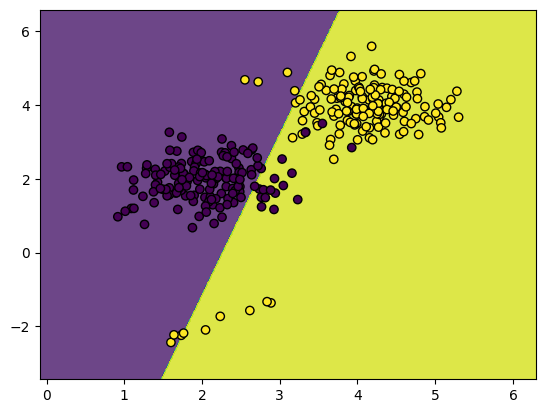

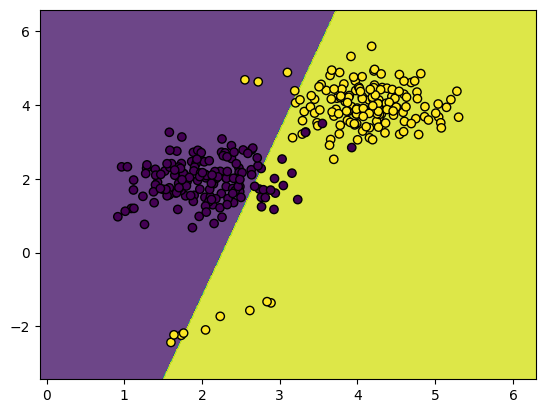

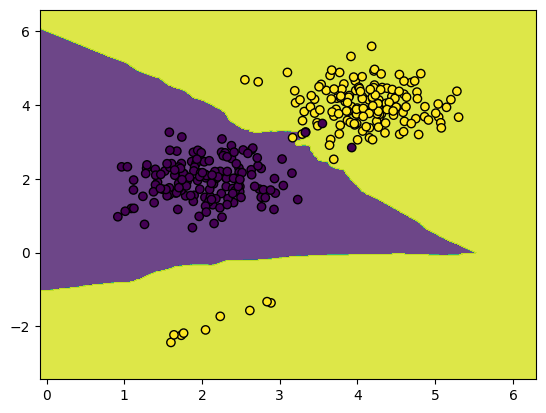

In [52]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(log_reg, X_test, y_test)
plot_decision_boundary(svm_model, X_test, y_test)
plot_decision_boundary(knn_model, X_test, y_test)



**Аналіз отриманих результатів**:

1.  KNN показав хороший результат досяягнувши точності серед трьох моделей 
2.   SVM та логістична регресія продемострувала однакову продуктивність




**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('synthetic_data.csv')
X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [54]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train_scaled, y_train)

svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [55]:
models = {
    'Logistic Regression': log_reg,
    'SVM': svm,
    'KNN': knn
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.996667   0.996689  0.996667
1                  SVM  0.996667   0.996689  0.996667
2                  KNN  0.996667   0.996689  0.996667


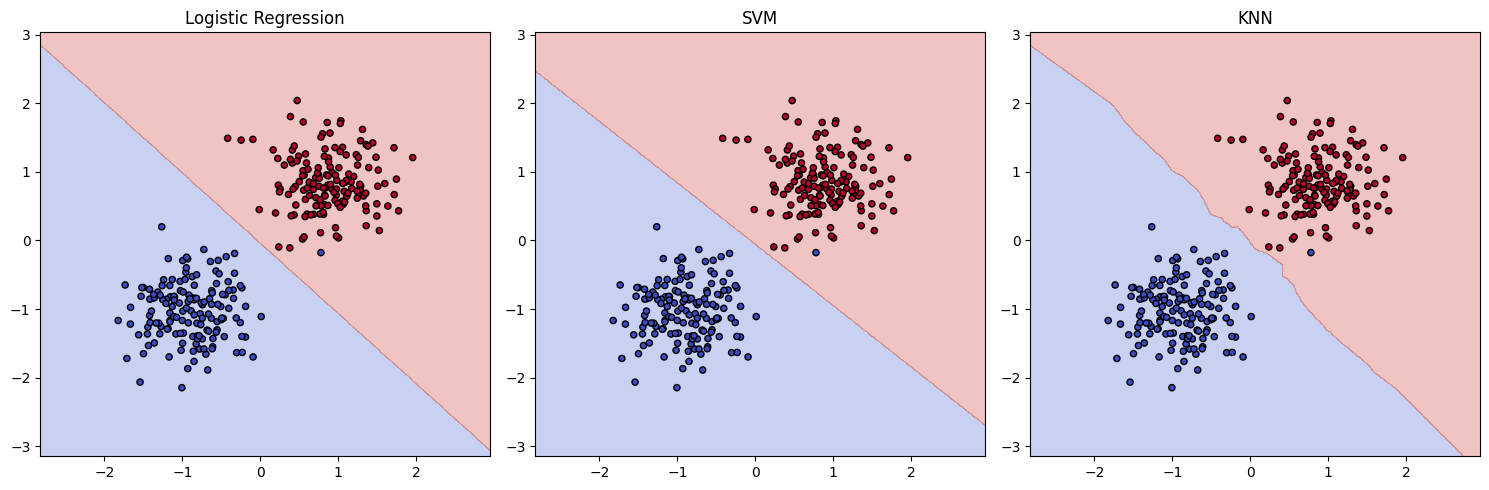

In [56]:
def plot_decision_boundary(clf, X, y, title):
    cmap = plt.get_cmap('coolwarm')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=cmap)
    plt.title(title)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_test_scaled, y_test, 'Logistic Regression')

plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_test_scaled, y_test, 'SVM')

plt.subplot(1, 3, 3)
plot_decision_boundary(knn, X_test_scaled, y_test, 'KNN')

plt.tight_layout()
plt.show()



**Аналіз отриманих результатів**:

1.   В цьому варіанті також можна замітити що SVM та логістична регресія продемострувала однакову продуктивність 
2. KNN досягла ідеальних результатів за всіма метриками, показуючи 100% точність, прецизію і повноту.





**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

sns.set(style="whitegrid")



In [72]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [73]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)


tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [74]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_tree = tree.predict(X_test)

metrics = {
    "Model": ["KNN", "SVM", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_tree)
    ],
    "Precision": [
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_tree)
    ],
    "Recall": [
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_tree)
    ]
}

import pandas as pd
results_df = pd.DataFrame(metrics)
print(results_df)



           Model  Accuracy  Precision    Recall
0            KNN  1.000000        1.0  1.000000
1            SVM  1.000000        1.0  1.000000
2  Decision Tree  0.986667        1.0  0.972222


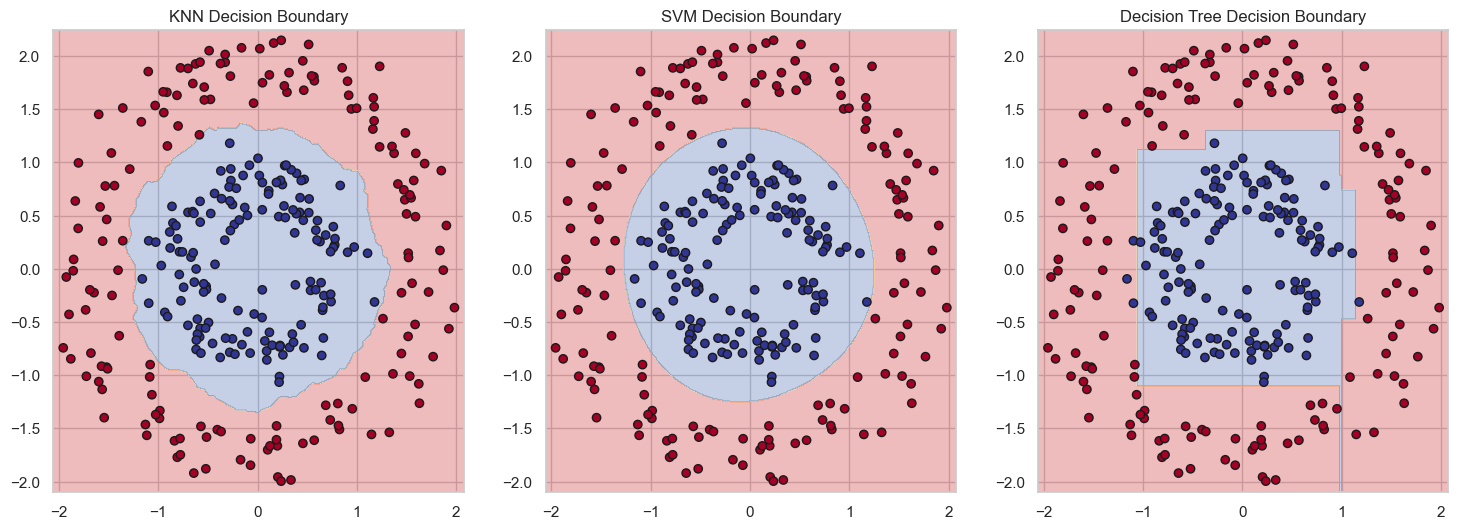

In [75]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(knn, X_test, y_test, axes[0], "KNN Decision Boundary")
plot_decision_boundary(svm, X_test, y_test, axes[1], "SVM Decision Boundary")
plot_decision_boundary(tree, X_test, y_test, axes[2], "Decision Tree Decision Boundary")
plt.show()



**Аналіз отриманих результатів**:

1.  При побудові тору отеченного іншим Decision Tree показала трохи нижчі результати порівняно з KNN і SVM. Незважаючи на ідеальну прецизію, модель втратила деякі точки при класифікації 

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

sns.set(style="whitegrid")


In [77]:
def create_spiral_data(points, noise=0.5):
    n = np.sqrt(np.random.rand(points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n) * n + np.random.rand(points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(points, 1) * noise
    X1 = np.hstack((d1x, d1y))

    d2x = np.cos(n) * n + np.random.rand(points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(points, 1) * noise
    X2 = np.hstack((d2x, d2y))

    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(points), np.ones(points)))
    return X, y

X, y = create_spiral_data(500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


In [78]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_tree = tree.predict(X_test)

metrics = {
    "Model": ["KNN", "SVM", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_tree)
    ],
    "Precision": [
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_tree)
    ],
    "Recall": [
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_tree)
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)


           Model  Accuracy  Precision    Recall
0            KNN  0.466667   0.462687  0.413333
1            SVM  0.483333   0.480315  0.406667
2  Decision Tree  0.433333   0.418033  0.340000


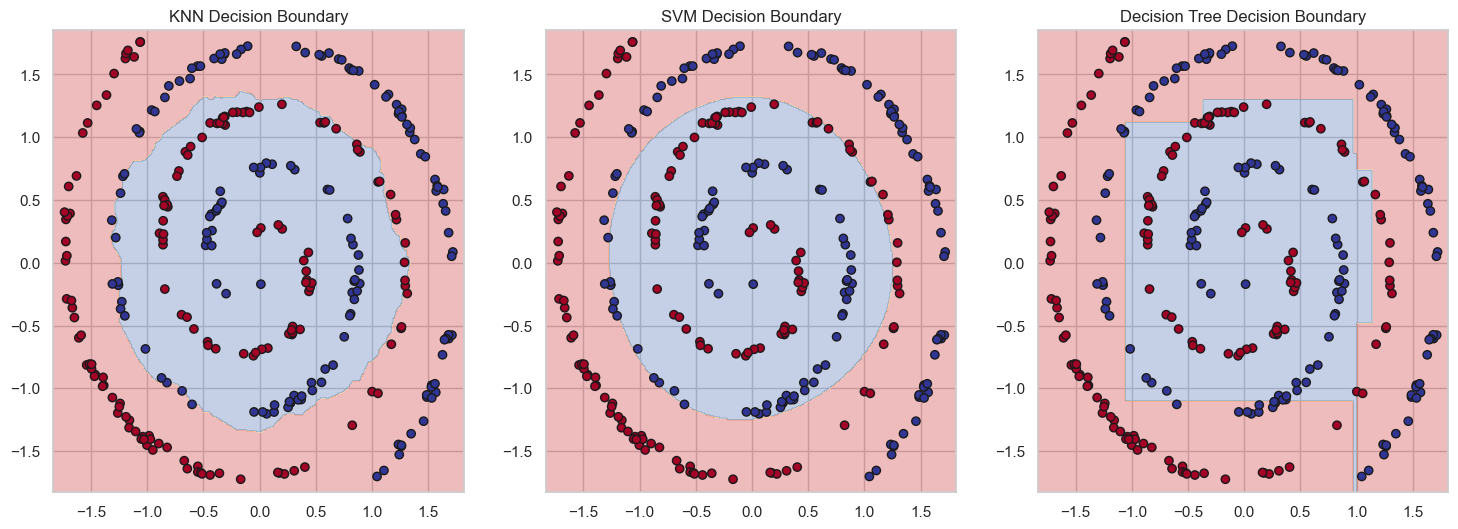

In [79]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
    ax.set_title(title)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(knn, X_test, y_test, axes[0], "KNN Decision Boundary")
plot_decision_boundary(svm, X_test, y_test, axes[1], "SVM Decision Boundary")
plot_decision_boundary(tree, X_test, y_test, axes[2], "Decision Tree Decision Boundary")
plt.show()


**Аналіз отриманих результатів**:

1. Результати показують, що жодна з моделей не впоралася добре із завданням класифікації. Це вказує на те, що структура даних є складною, і необхідно спробувати моделі, здатні ефективніше працювати з нелінійними та складними межами між класами.